In [ ]:
import pandas as pd

df = pd.read_csv('milknew.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])

df['Grade'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 2])

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


High = 0
Low = 1
Medium = 2

# Correlation Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


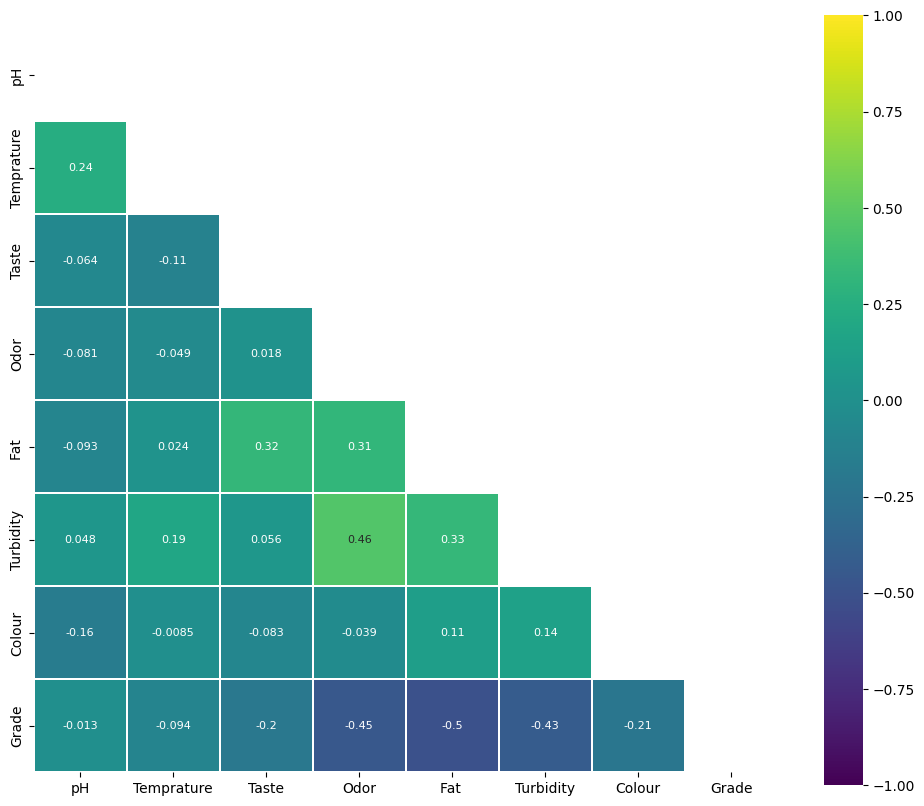

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, mask=mask)

plt.show()

# XGB Classifier

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is in a DataFrame df
# X should contain your features, and y should contain your target variable
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Turbidity', 'Colour','Fat ']]
y = df['Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBRegressor model
model_xgb = XGBClassifier()

# Fit the model
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGB Classifier: {accuracy * 100:.2f}%")
print("==================================")

# Display classification report
print("Classification Report of XGB Classifier:")
print(classification_report(y_test, y_pred))

Accuracy of XGB Classifier: 100.00%
Classification Report of XGB Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00       127

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Feature  Importance
0   Turbidity    0.347750
1          pH    0.257273
2  Temprature    0.172343
3        Fat     0.114407
4        Odor    0.070847
5       Taste    0.023840
6      Colour    0.013539


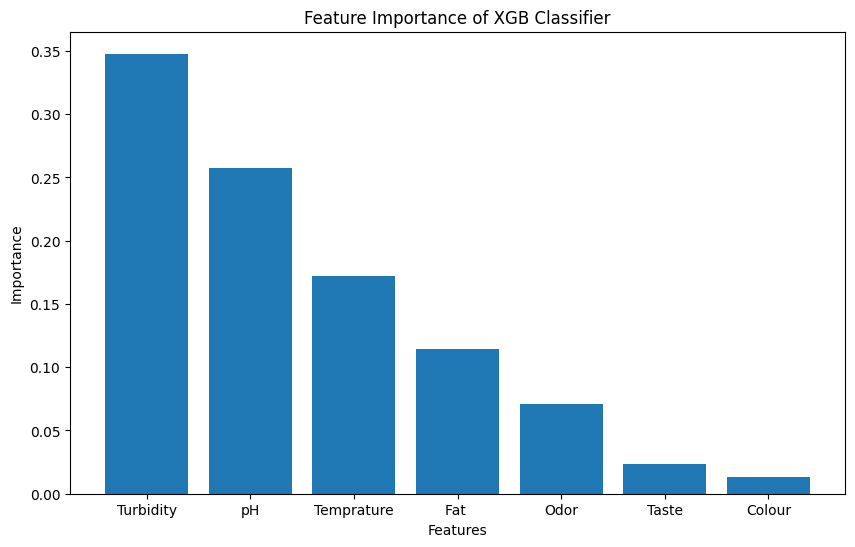

In [ ]:
# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(feature_importance)
print("============================")

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance of XGB Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier model
model_tree = DecisionTreeClassifier()

# Fit the model on the training data
model_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy * 100:.2f}%")

# Display classification report
print("Classification Report of Decision Tree Classifier:")
print(classification_report(y_test, y_pred))


Accuracy of Decision Tree Classifier: 99.37%
Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       1.00      0.99      1.00       115
           2       0.99      1.00      1.00       127

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Feature  Importance
0          pH    0.437360
1  Temprature    0.202590
2        Odor    0.173672
3      Colour    0.073560
4        Fat     0.072404
5       Taste    0.036436
6   Turbidity    0.003977


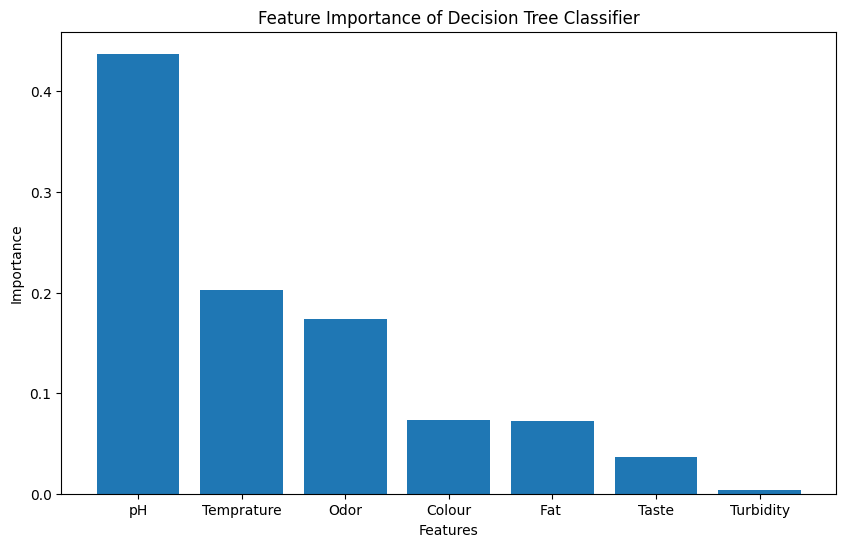

In [ ]:
# Plot feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model_tree.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(feature_importance)
print("============================")

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance of Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


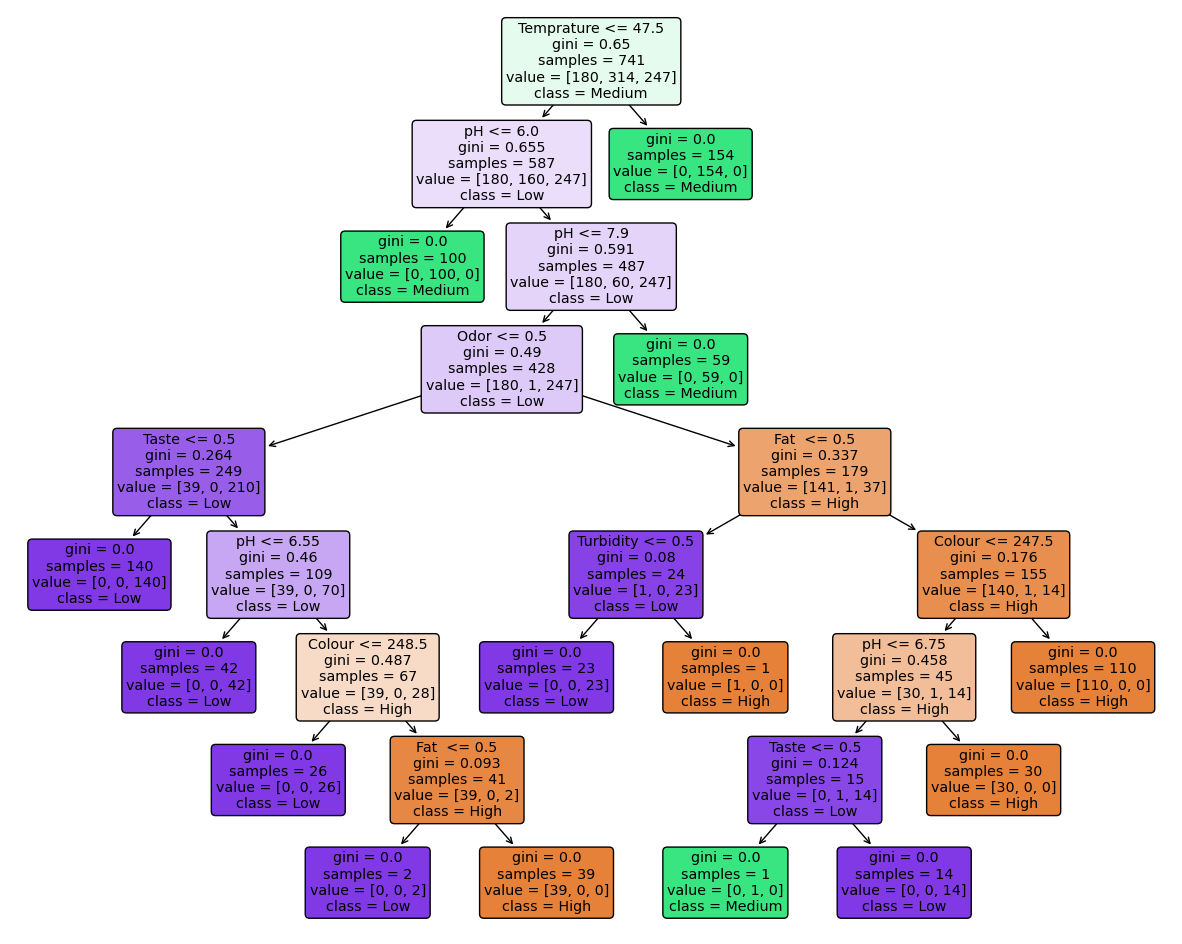

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 12))
plot_tree(model_tree, feature_names=X.columns, class_names=['High', 'Medium', 'Low'], filled=True, rounded=True)
plt.show()

# Hypothesis Testing

In [ ]:
df = pd.read_csv('milknew.csv')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])

df['Grade'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 2])

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

def test_feature_correlation(df, feature, target='Grade', alpha=0.05):
    # Create a contingency table
    contingency_table = pd.crosstab(df[target], df[feature])

    # Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check the p-value against alpha
    if p < alpha:
        print(f"There is a significant correlation between {feature} and {target} (p-value: {p})")
    else:
        print(f"There is no significant correlation between {feature} and {target} (p-value: {p})")

for feature in ['pH', 'Temprature', 'Odor', 'Turbidity', 'Fat ']:
    test_feature_correlation(df, feature)

There is a significant correlation between pH and Grade (p-value: 1.1282179727450139e-195)
There is a significant correlation between Temprature and Grade (p-value: 2.7234716939227783e-120)
There is a significant correlation between Odor and Grade (p-value: 2.3636403506556597e-48)
There is a significant correlation between Turbidity and Grade (p-value: 5.699600257861163e-69)
There is a significant correlation between Fat  and Grade (p-value: 8.519529787197151e-59)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Mutual Information Classifier

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming df is your DataFrame containing 'pH', 'Temperature', 'Odor', 'Turbidity', 'Fat', and 'Grade'
# Replace 'your_data.csv' with your actual data source
df = pd.read_csv('milknew.csv')

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])

# Define features and target variable
X = df[['pH', 'Temprature', 'Odor', 'Turbidity', 'Fat ']]
y = df['Grade']

# Calculate mutual information between features and target
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to display mutual information
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
feature_importance_df = feature_importance_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Display the result
print("==================================")
print("Mutual Information:")
print(feature_importance_df)
print("==================================")
# Most important feature
most_important_feature = feature_importance_df.iloc[0]['Feature']
print(f"\nThe most important feature is: {most_important_feature}")

Mutual Information:
      Feature  Mutual Information
0          pH            0.570740
1  Temprature            0.388610
2   Turbidity            0.163878
3        Fat             0.152396
4        Odor            0.104995

The most important feature is: pH


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('milknew.csv')
df = df[['pH', 'Temprature', 'Odor', 'Turbidity', 'Fat ','Grade']]
# Convert features to categorical for Apriori
df_cat = df.astype('category')
# Create a DataFrame with binary values indicating the presence of features
df_bin = pd.get_dummies(df_cat)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets.sort_values(by='support',ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.671388,(Fat _1)
1,0.567517,(Odor_0)
2,0.508971,(Turbidity_0)
3,0.491029,(Turbidity_1)
4,0.432483,(Odor_1)
...,...,...
1541,0.010387,"(Odor_0, Fat _1, Temprature_50)"
1542,0.010387,"(Turbidity_0, Odor_0, Grade_low, Fat _1, Tempr..."
1543,0.010387,"(Turbidity_0, Odor_0, Fat _1, Temprature_50)"
1544,0.010387,"(Fat _1, Odor_0, Temprature_50, Grade_low)"


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Temprature_40),(pH_3.0),0.124646,0.066100,0.066100,0.530303,8.022727,0.057861,1.988303,1.000000
1,(pH_3.0),(Temprature_40),0.066100,0.124646,0.066100,1.000000,8.022727,0.057861,inf,0.937310
2,(pH_3.0),(Odor_1),0.066100,0.432483,0.048159,0.728571,1.684623,0.019571,2.090850,0.435159
3,(Odor_1),(pH_3.0),0.432483,0.066100,0.048159,0.111354,1.684623,0.019571,1.050924,0.716094
4,(Turbidity_1),(pH_3.0),0.491029,0.066100,0.048159,0.098077,1.483764,0.015702,1.035454,0.640584
...,...,...,...,...,...,...,...,...,...,...
18335,(Grade_low),"(Temprature_34, Fat _0, pH_9.5, Odor_1, Turbid...",0.405099,0.022663,0.022663,0.055944,2.468531,0.013482,1.035253,1.000000
18336,(Fat _0),"(Temprature_34, Grade_low, pH_9.5, Odor_1, Tur...",0.328612,0.022663,0.022663,0.068966,3.043103,0.015216,1.049732,1.000000
18337,(pH_9.5),"(Temprature_34, Grade_low, Fat _0, Odor_1, Tur...",0.022663,0.022663,0.022663,1.000000,44.125000,0.022149,inf,1.000000
18338,(Odor_1),"(Temprature_34, Grade_low, Fat _0, pH_9.5, Tur...",0.432483,0.022663,0.022663,0.052402,2.312227,0.012862,1.031383,1.000000


In [ ]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18340 entries, 0 to 18339
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         18340 non-null  object 
 1   consequents         18340 non-null  object 
 2   antecedent support  18340 non-null  float64
 3   consequent support  18340 non-null  float64
 4   support             18340 non-null  float64
 5   confidence          18340 non-null  float64
 6   lift                18340 non-null  float64
 7   leverage            18340 non-null  float64
 8   conviction          18340 non-null  float64
 9   zhangs_metric       18340 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_rules = rules[
    rules['consequents'].apply(lambda x: all(item in ['Grade_high', 'Grade_medium', 'Grade_low'] for item in x))
].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pH_3.0),(Grade_low),0.066100,0.405099,0.066100,1.000000,2.468531,0.039323,inf,0.637007
1,"(Turbidity_1, Temprature_66, Odor_0)",(Grade_low),0.022663,0.405099,0.022663,1.000000,2.468531,0.013482,inf,0.608696
2,"(Turbidity_0, Odor_0, Temprature_50)",(Grade_low),0.018886,0.405099,0.018886,1.000000,2.468531,0.011235,inf,0.606352
3,"(Turbidity_1, Odor_0, Temprature_50)",(Grade_low),0.011331,0.405099,0.011331,1.000000,2.468531,0.006741,inf,0.601719
4,"(Fat _0, Odor_0, Temprature_50)",(Grade_low),0.019830,0.405099,0.019830,1.000000,2.468531,0.011797,inf,0.606936
...,...,...,...,...,...,...,...,...,...,...
760,"(Odor_0, Temprature_43)",(Grade_high),0.050992,0.241737,0.013220,0.259259,1.072483,0.000893,1.023654,0.071215
761,"(Turbidity_1, Temprature_40, Odor_1)",(Grade_high),0.066100,0.241737,0.016997,0.257143,1.063728,0.001018,1.020738,0.064150
762,"(Temprature_40, Odor_1)",(Grade_high),0.066100,0.241737,0.016997,0.257143,1.063728,0.001018,1.020738,0.064150
763,"(Turbidity_0, Odor_0, Fat _1)",(Grade_high),0.202077,0.241737,0.050992,0.252336,1.043845,0.002142,1.014176,0.052641


In [ ]:
# Convert frozenset to string
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(x))
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_rules['feature_names'] = filtered_rules['antecedents'].apply(lambda x: [item.split('_')[0].strip() for item in x.split(',')])
filtered_rules['feature_names'] = filtered_rules['feature_names'].apply(lambda x: ', '.join(x))
all_filtered_rules = filtered_rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)
filtered_rules = filtered_rules[filtered_rules['confidence']>=0.80].sort_values(by='confidence', ascending=False).reset_index(drop=True)
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,feature_names
0,pH_3.0,Grade_low,0.066100,0.405099,0.066100,1.000000,2.468531,0.039323,inf,0.637007,pH
1,"Turbidity_1, pH_4.5, Fat _1, Odor_1",Grade_low,0.034939,0.405099,0.034939,1.000000,2.468531,0.020785,inf,0.616438,"Turbidity, pH, Fat, Odor"
2,"Turbidity_1, pH_4.5, Temprature_38, Odor_1",Grade_low,0.017941,0.405099,0.017941,1.000000,2.468531,0.010673,inf,0.605769,"Turbidity, pH, Temprature, Odor"
3,"pH_4.5, Fat _1, Temprature_38, Odor_1",Grade_low,0.017941,0.405099,0.017941,1.000000,2.468531,0.010673,inf,0.605769,"pH, Fat, Temprature, Odor"
4,"Turbidity_1, Fat _1, Temprature_38, pH_4.5",Grade_low,0.017941,0.405099,0.017941,1.000000,2.468531,0.010673,inf,0.605769,"Turbidity, Fat, Temprature, pH"
...,...,...,...,...,...,...,...,...,...,...,...
570,pH_6.5,Grade_medium,0.178470,0.353163,0.146364,0.820106,2.322171,0.083335,3.595651,0.693059,pH
571,"Turbidity_0, Odor_0, pH_6.8, Fat _1",Grade_medium,0.066100,0.353163,0.053824,0.814286,2.305691,0.030480,3.482967,0.606372,"Turbidity, Odor, pH, Fat"
572,"Odor_0, Fat _1, pH_6.8",Grade_medium,0.066100,0.353163,0.053824,0.814286,2.305691,0.030480,3.482967,0.606372,"Odor, Fat, pH"
573,"Turbidity_1, Odor_0, Temprature_43, Fat _1",Grade_low,0.044381,0.405099,0.035883,0.808511,1.995834,0.017904,3.106704,0.522129,"Turbidity, Odor, Temprature, Fat"


In [ ]:
all_filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,feature_names
0,pH_3.0,Grade_low,0.066100,0.405099,0.066100,1.000000,2.468531,0.039323,inf,0.637007,pH
1,"Turbidity_1, Temprature_66, Odor_0",Grade_low,0.022663,0.405099,0.022663,1.000000,2.468531,0.013482,inf,0.608696,"Turbidity, Temprature, Odor"
2,"Turbidity_0, Odor_0, Temprature_50",Grade_low,0.018886,0.405099,0.018886,1.000000,2.468531,0.011235,inf,0.606352,"Turbidity, Odor, Temprature"
3,"Turbidity_1, Odor_0, Temprature_50",Grade_low,0.011331,0.405099,0.011331,1.000000,2.468531,0.006741,inf,0.601719,"Turbidity, Odor, Temprature"
4,"Fat _0, Odor_0, Temprature_50",Grade_low,0.019830,0.405099,0.019830,1.000000,2.468531,0.011797,inf,0.606936,"Fat, Odor, Temprature"
...,...,...,...,...,...,...,...,...,...,...,...
760,"Odor_0, Temprature_43",Grade_high,0.050992,0.241737,0.013220,0.259259,1.072483,0.000893,1.023654,0.071215,"Odor, Temprature"
761,"Turbidity_1, Temprature_40, Odor_1",Grade_high,0.066100,0.241737,0.016997,0.257143,1.063728,0.001018,1.020738,0.064150,"Turbidity, Temprature, Odor"
762,"Temprature_40, Odor_1",Grade_high,0.066100,0.241737,0.016997,0.257143,1.063728,0.001018,1.020738,0.064150,"Temprature, Odor"
763,"Turbidity_0, Odor_0, Fat _1",Grade_high,0.202077,0.241737,0.050992,0.252336,1.043845,0.002142,1.014176,0.052641,"Turbidity, Odor, Fat"


In [ ]:
filtered_rules.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         575 non-null    object 
 1   consequents         575 non-null    object 
 2   antecedent support  575 non-null    float64
 3   consequent support  575 non-null    float64
 4   support             575 non-null    float64
 5   confidence          575 non-null    float64
 6   lift                575 non-null    float64
 7   leverage            575 non-null    float64
 8   conviction          575 non-null    float64
 9   zhangs_metric       575 non-null    float64
 10  feature_names       575 non-null    object 
dtypes: float64(8), object(3)
memory usage: 49.5+ KB


In [ ]:
df_gradelow = filtered_rules[filtered_rules['consequents']=='Grade_low'].sort_values(by='confidence').reset_index(drop=True)
df_grademedium = filtered_rules[filtered_rules['consequents']=='Grade_medium'].sort_values(by='confidence').reset_index(drop=True)
df_gradehigh = filtered_rules[filtered_rules['consequents']=='Grade_high'].sort_values(by='confidence').reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


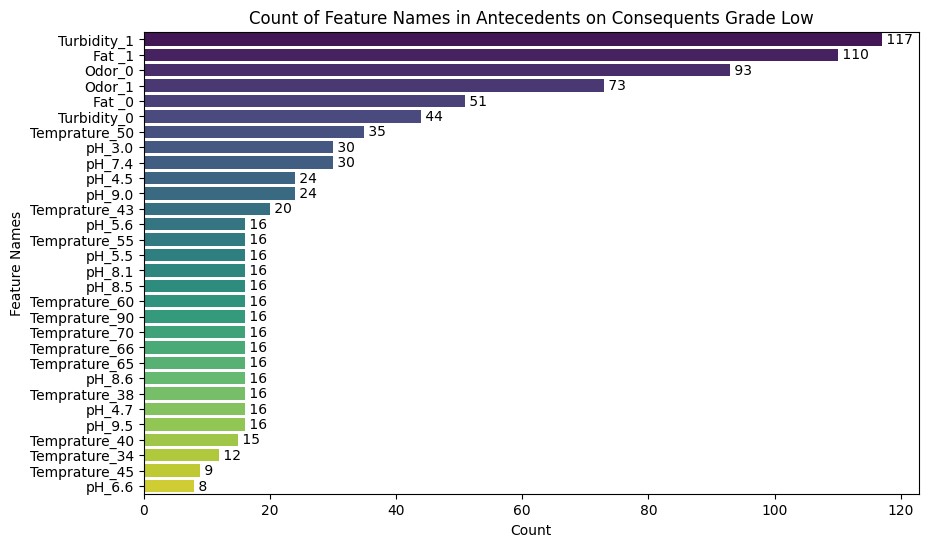

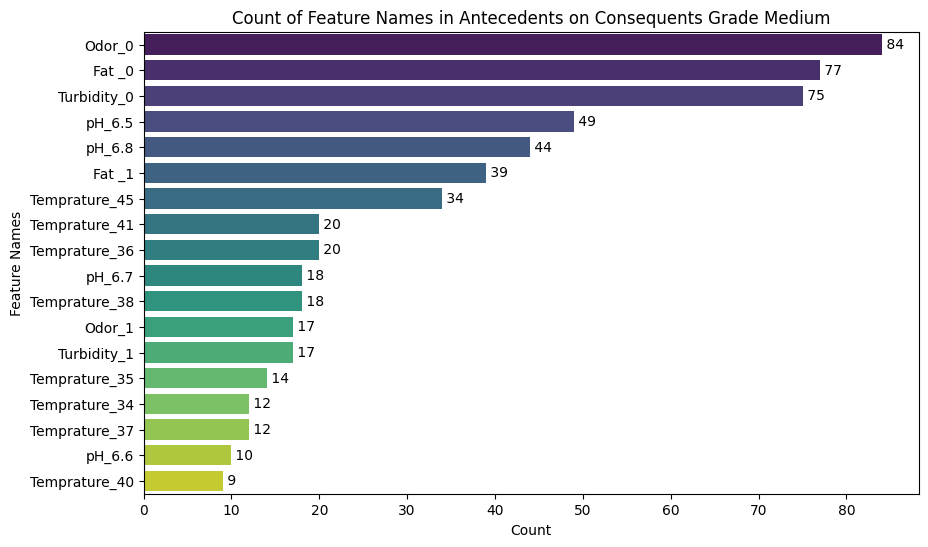

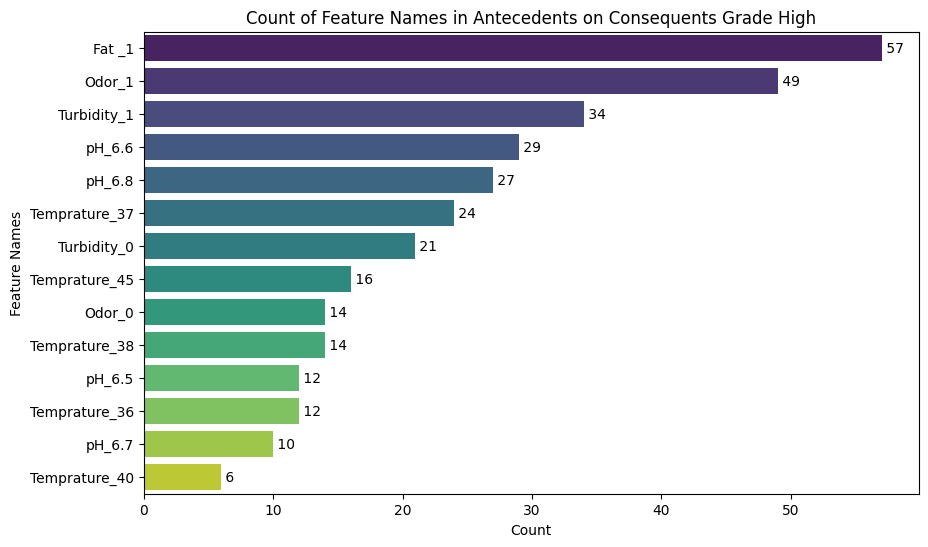

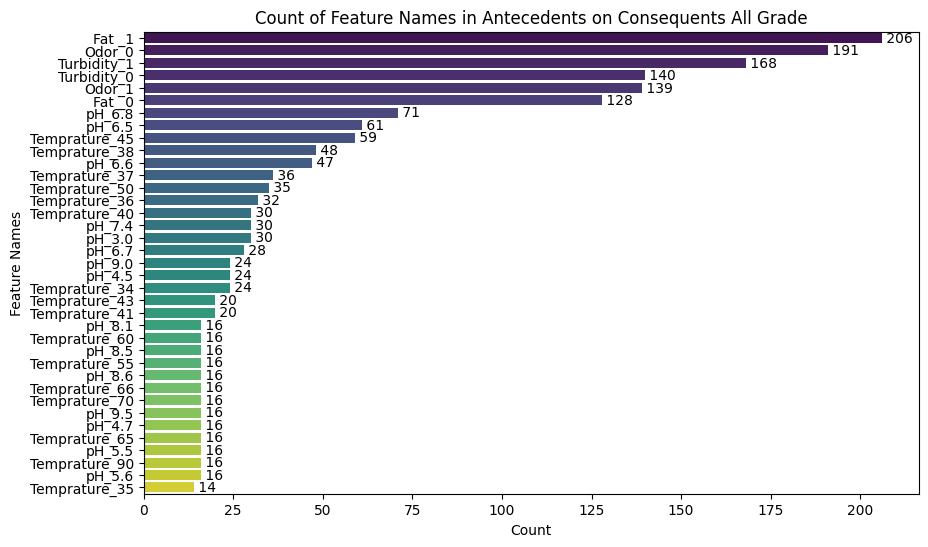

In [ ]:
def visualize_count_feature(df, name):
  feature_names = [feature.strip() for sublist in df['antecedents'].str.split(',') for feature in sublist]

  # Count occurrences of each feature
  feature_counts = pd.Series(feature_names).value_counts()

  # Create a bar chart
  plt.figure(figsize=(10, 6))
  sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')

  # Add labels and title
  plt.xlabel('Count')
  plt.ylabel('Feature Names')
  plt.title(f'Count of Feature Names in Antecedents on Consequents {name}')

  # Display the count values on the bars
  for i, value in enumerate(feature_counts.values):
      plt.text(value, i, f' {value}', va='center', fontsize=10)

  plt.show()

visualize_count_feature(df_gradelow, 'Grade Low')
visualize_count_feature(df_grademedium, 'Grade Medium')
visualize_count_feature(df_gradehigh, 'Grade High')
visualize_count_feature(filtered_rules, 'All Grade')

In [ ]:
feature_data = filtered_rules[['feature_names']]
feature_data['feature_names'] = feature_data['feature_names'].apply(lambda x: [item.strip() for item in x.split(',')])
feature_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-317-19120721c731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['feature_names'] = feature_data['feature_names'].apply(lambda x: [item.strip() for item in x.split(',')])


,feature_names
0,[pH]
1,"[Turbidity, pH, Fat, Odor]"
2,"[Turbidity, pH, Temprature, Odor]"
3,"[pH, Fat, Temprature, Odor]"
4,"[Turbidity, Fat, Temprature, pH]"
...,...
570,[pH]
571,"[Turbidity, Odor, pH, Fat]"
572,"[Odor, Fat, pH]"
573,"[Turbidity, Odor, Temprature, Fat]"


In [ ]:
# Flatten the list of feature names
feature_list = [feature for sublist in feature_data['feature_names'] for feature in sublist]

# Count occurrences of each feature
feature_counts = pd.Series(feature_list).value_counts()
feature_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pH            427
Temprature    414
Fat           334
Odor          330
Turbidity     308
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


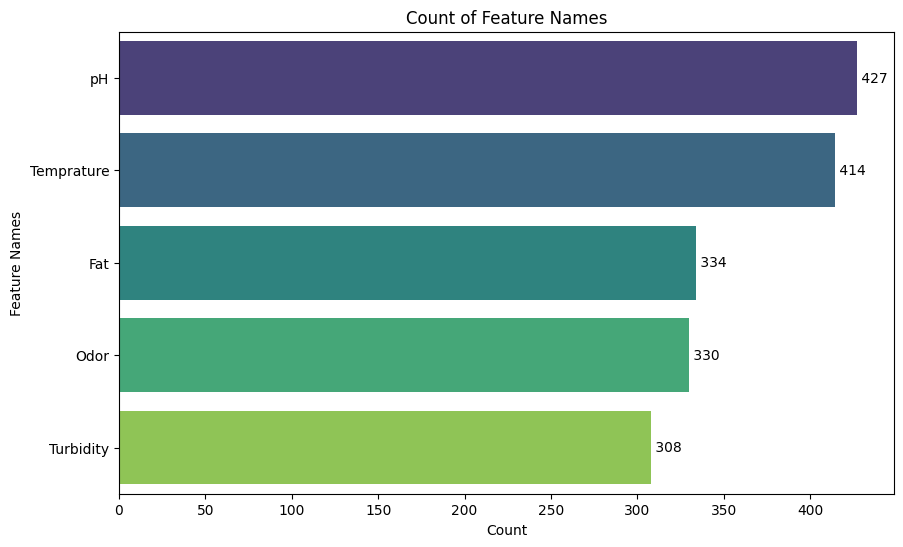

In [ ]:
# Count occurrences of each feature
feature_counts = pd.Series(feature_list).value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.title('Count of Feature Names')

# Display the count values on the bars
for i, value in enumerate(feature_counts.values):
    plt.text(value, i, f' {value}', va='center', fontsize=10)

plt.show()

In [ ]:
consequents_data = filtered_rules['consequents'].value_counts()
consequents_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grade_low       310
Grade_medium    170
Grade_high       95
Name: consequents, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


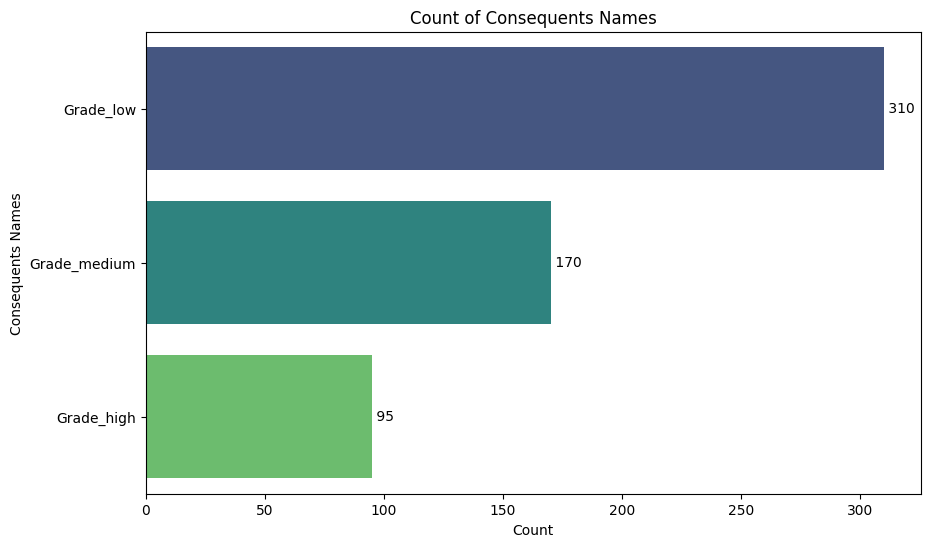

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=consequents_data.values, y=consequents_data.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Consequents Names')
plt.title('Count of Consequents Names')

# Display the count values on the bars
for i, value in enumerate(consequents_data.values):
    plt.text(value, i, f' {value}', va='center', fontsize=10)

plt.show()